## AUTHOR-ASHISH KUMAR SINGH


## THE GRIP SPARKs FOUNDATION

## Data Science and Business Analytics Internship

## Task(2)-From the given 'Iris' data set predict the optimum number of clusters and represent it visually.

## From the given 'Iris' data set predict the optimum number of clusters and represent it visually.


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_iris
iris= load_iris()

In [3]:
# dispaly the name of attributes
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
# dispaly col names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# create dataframe with all col

df= pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# Do scaling for petal lenght and width cols using MinMaxScaler
scaler=MinMaxScaler()

In [7]:
# fit the scale to petal lenght
scaler.fit(df[['petal length (cm)']])

MinMaxScaler()

In [8]:
# fit the scale to petal width
scaler.fit(df[['petal width (cm)']])

MinMaxScaler()

In [9]:
df['petal width (cm)']= scaler.transform(df[['petal width (cm)']])

In [10]:
# dispaly the data frame after scaling the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.041667
1,4.9,3.0,1.4,0.041667
2,4.7,3.2,1.3,0.041667
3,4.6,3.1,1.5,0.041667
4,5.0,3.6,1.4,0.041667


In [11]:
# elbow plot to confirm the k values

sse=[]
k_rng=range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)     #Inertia_ = sum of squared distance

C:\Users\dream\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dream\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dream\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dream\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

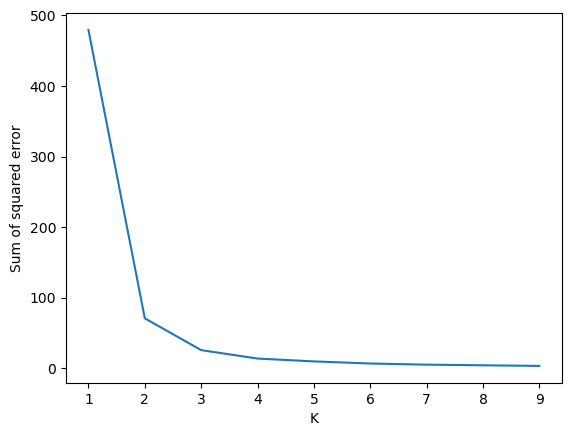

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
# the above plot suggest k is 3

In [13]:
# now fit the k-measn clustering to petal lenght and width cols
# take the k values as 3 as suggested in the previuos code
km= KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

C:\Users\dream\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dream\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# store the y_predicted values into cluster col in the data frame
df['cluster']= y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.041667,1
1,4.9,3.0,1.4,0.041667,1
2,4.7,3.2,1.3,0.041667,1
3,4.6,3.1,1.5,0.041667,1
4,5.0,3.6,1.4,0.041667,1


In [15]:
# divide into 3 data frames depending on cluster numbers
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [16]:
x = km.cluster_centers_[:,0]
y = km.cluster_centers_[:,1]

<function matplotlib.pyplot.legend(*args, **kwargs)>

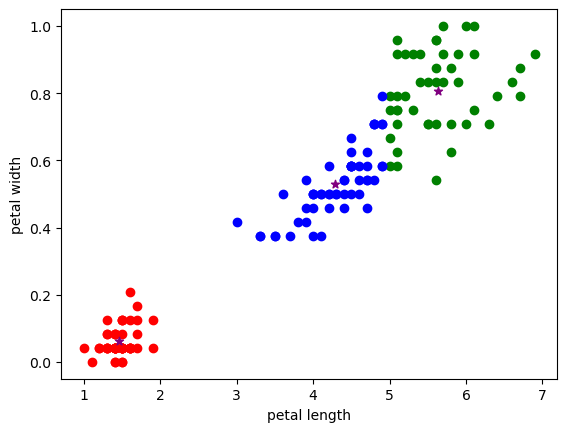

In [17]:
# let us visulaize the 3 groups. draw the scatter plots of each cluster with their centers
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='o')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',marker='o')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue',marker='o')
plt.scatter(x,y,color='purple',marker='*',label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend